## HW2 | KNN Graph Instruction

#### 1. Fill in all code (under # put your code here)

#### 2. Must use Pandas or Numpy if there is an instruction 

#### 3. Generate the plot that is exactly the same as the table right after each code block

#### 4. Answer the question at the end of this jupyter notebook


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline 

## Swiss Banknote Dataset

Six variables measured on 100 genuine and 100 counterfeit old Swiss 1000-franc
bank notes. The data stem from Flury and Riedwyl (1988). The columns correspond
to the following one label and six variables:

0. Conterfeit - 0: genuine bank notes、1: genuine bank notes (Labels)


1. Length - Length of the bank note


2. Left - Height of the bank note, measured on the left


3. Right - Height of the bank note, measured on the right


4. Bottom - Distance of inner frame to the lower border


5. Top - Distance of inner frame to the upper border


6. Diagonal - Length of the diagonal



More details: [Kaggle | Swiss banknote conterfeit detection](https://www.kaggle.com/chrizzles/swiss-banknote-conterfeit-detection)

In [26]:
# Use [Pandas] to import data | banknotes.csv
# Put your code here 

bank = pd.read_csv('banknotes.csv')
label = bank.conterfeit

bank.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [27]:
label

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: conterfeit, Length: 200, dtype: int64

In [ ]:
# Use [Numpy function] to stack the following columns
# The 5-th column "Bottom" as X, the 6-th column "Top" as Y
# Put your code here

data_xy = np.array(bank.iloc[:,[4,5]])
data_xy

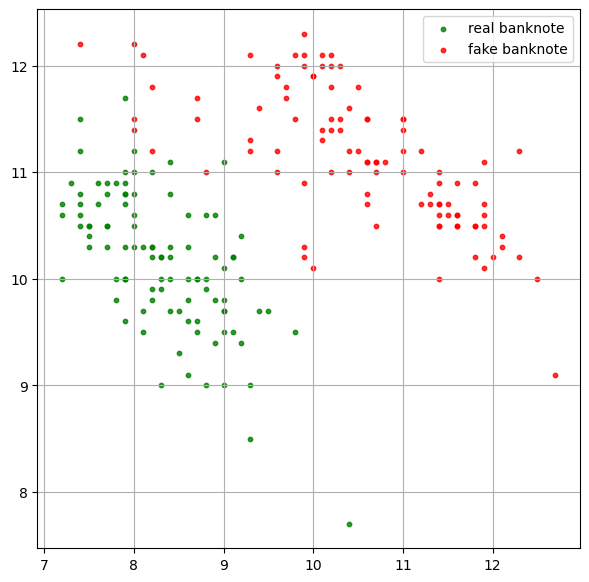

In [63]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = data_xy[label==0]
index_1 =  data_xy[label==1]


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter 
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (7, 7))
plt.scatter(index_0[:,0],index_0[:,1],s=10, alpha=0.8,label='real banknote',c='green')
plt.scatter(index_1[:,0],index_1[:,1],s=10, alpha=0.8,label='fake banknote',c='red')
plt.legend(loc='upper right')
plt.grid(True)

- [compute ED 5ways](#https://rrrjin.medium.com/several-ways-to-calculate-squared-euclidean-distance-matrices-in-python-b45c9b6d26e6)
- [K nearest neighbor implement](#https://wizardforcel.gitbooks.io/ds-ipynb/content/docs/9.10.html)

In [56]:
def compute_ED(X):
    m,n = X.shape
    G = np.dot(X,X.T)
    D = np.zeros((m,m))
    for i in range(m):
        for j in range(i+1,m):
            D[i,j] = G[i,i]-2*G[i,j]+G[j,j]
            D[j,i] = D[i,j]
    return D

In [ ]:
# Use [Numpy function] to calculate the squared distance matrix between each points
# Put your code here

#  |x-y|**2

dist_sq = compute_ED(data_xy)
dist_sq

array([[ 0.  ,  0.85,  0.1 , ...,  4.52,  7.09,  4.68],
       [ 0.85,  0.  ,  0.37, ...,  8.81, 12.5 ,  8.41],
       [ 0.1 ,  0.37,  0.  , ...,  5.86,  8.81,  5.86],
       ...,
       [ 4.52,  8.81,  5.86, ...,  0.  ,  0.37,  0.32],
       [ 7.09, 12.5 ,  8.81, ...,  0.37,  0.  ,  1.09],
       [ 4.68,  8.41,  5.86, ...,  0.32,  1.09,  0.  ]])

In [73]:
dist_sq = np.sum((data_xy[:, np.newaxis, :] - data_xy[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq

array([[ 0.  ,  0.85,  0.1 , ...,  4.52,  7.09,  4.68],
       [ 0.85,  0.  ,  0.37, ...,  8.81, 12.5 ,  8.41],
       [ 0.1 ,  0.37,  0.  , ...,  5.86,  8.81,  5.86],
       ...,
       [ 4.52,  8.81,  5.86, ...,  0.  ,  0.37,  0.32],
       [ 7.09, 12.5 ,  8.81, ...,  0.37,  0.  ,  1.09],
       [ 4.68,  8.41,  5.86, ...,  0.32,  1.09,  0.  ]])

In [107]:
nearest_k = np.argpartition(dist_sq, K + 1, axis=1)
nearest_k[0]

array([ 82,  26,  43,   0,  95,  41,  67,  40,  56,   9,  98,  55,  96,
        57,  94,  72,  16,  17,  92,  19,  91,  51,  31,  23,  90,  87,
        68,  27,  86,  76,  85,   5,  60,  33,   2,  35,  36,  80,  38,
        42,  20,  45,  39,  34,  46,  65,  44,  37,  79,  49,  29,  21,
        15,  71,  54,  97,   1, 124,   6,  59, 161, 166,  64,  99,  63,
        62,  66,  61,  58,  69,  70,  53,  52,  73,  74,  75,  50,  77,
        78,  48,  47,  81,  32,  83,  84,  30,  28,  25,  88,  89,  24,
        22,  18,  93,  14,  13,  12,  11,  10,   8, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123,   7, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160,   4, 162, 163, 164, 165,   3, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [112]:
nearest_k[0, :K+1]

array([82, 26, 43,  0])

In [95]:
def nearest_partition(dist_sq, K):
    
    # Use [Numpy function] to return the "K Nearest Neighbor"
    # Put your code here
         
    return np.argpartition(dist_sq, K + 1, axis=1)

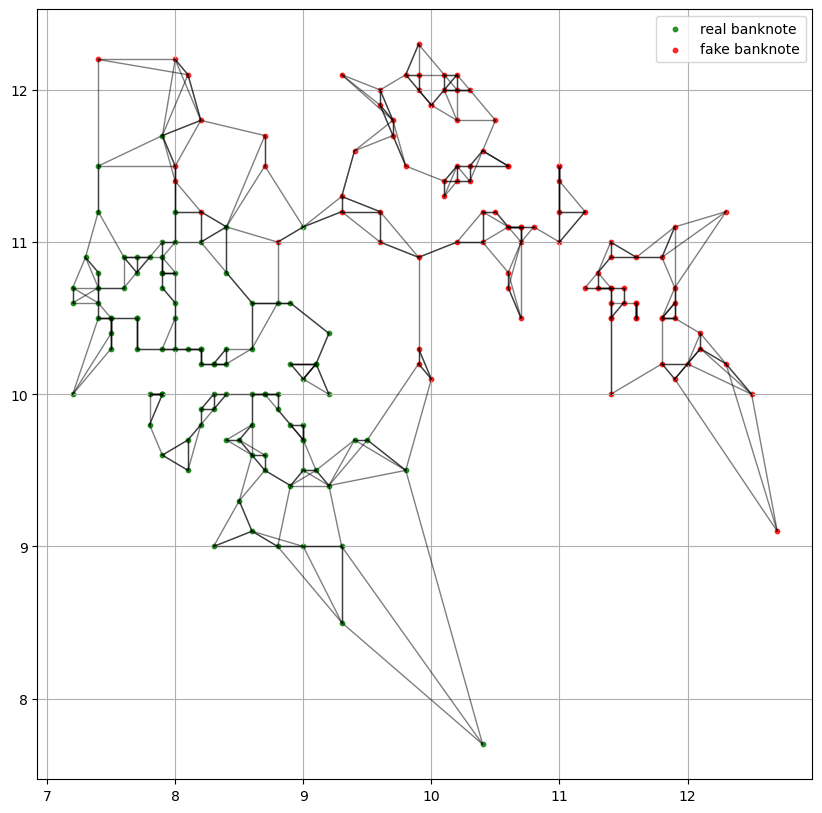

In [123]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = data_xy[label==0]
index_1 = data_xy[label==1]


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (10, 10))
plt.scatter(index_0[:,0],index_0[:,1],s=10, alpha=0.8,label='real banknote',c='green')
plt.scatter(index_1[:,0],index_1[:,1],s=10, alpha=0.8,label='fake banknote',c='red')
plt.legend(loc='upper right')
plt.grid(True)

        
# Draw lines from each point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put your code here

K = 3
nearest_k = nearest_partition(dist_sq, K)
for i in range(data_xy.shape[0]):
    for j in nearest_k[i, :K+1]:
        plt.plot(*zip(data_xy[j], data_xy[i]),color='black', linewidth=1, alpha=0.5)

In [144]:
for i, txt in enumerate(text):
    print(((data_xy[ target[i], 0])+0.1, data_xy[ target[i], 1]),txt)

(11.5, 10.7) A
(8.299999999999999, 11.0) B
(10.5, 11.2) C


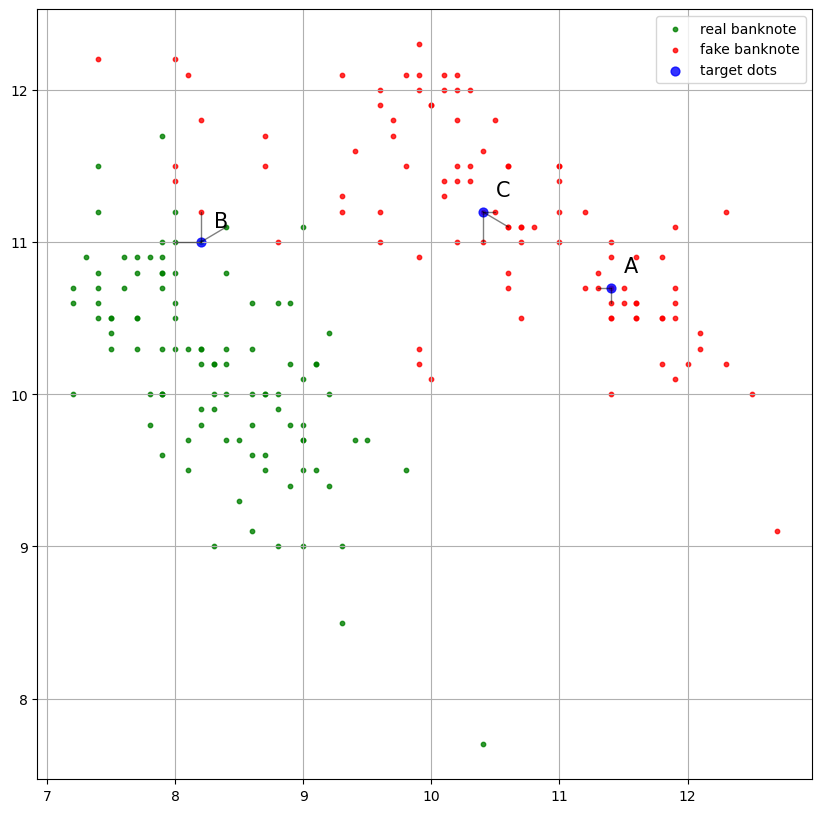

In [149]:
# Set seed = 10 | Random select three dots from data_xy
# Save dots index in varible "target" 
# Don't need to change below three lines

random.seed(10)
target = np.array([random.randint(0, len(data_xy)) for i in range(3)])
text = ['A', 'B', 'C']


# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = data_xy[label==0]
index_1 = data_xy[label==1]

# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red | Target → color = blue
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (10, 10))
plt.scatter(index_0[:,0],index_0[:,1],s=10, alpha=0.8,label='real banknote',c='green')
plt.scatter(index_1[:,0],index_1[:,1],s=10, alpha=0.8,label='fake banknote',c='red')
plt.scatter(data_xy[ target, 0],data_xy[ target, 1],s=40, alpha=0.8,label='target dots',c='blue')
for i, txt in enumerate(text):
    plt.text(data_xy[ target[i], 0]+0.1, data_xy[ target[i], 1]+0.1,txt,fontsize=15)
plt.legend(loc='upper right')
plt.grid(True)



# Draw lines from the selected three point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put text A, B, C on each dots (location: Right + 0.1、 Up + 0.1)
# Put your code here

K = 3
nearest_k = nearest_partition(dist_sq, K)
for i in target:
    for j in nearest_k[i, :K+1]:
        plt.plot(*zip(data_xy[j], data_xy[i]),color='black', linewidth=1, alpha=0.5)


### Question：由上圖進行判斷，回答 ABC 三點各自被 KNN 分為哪一群，並說明原因。

### Your Answer： A、C因為三個點都是屬於fake banknote，因此劃分為fake banknote，而B兩個點為real banknote，一個點為fake banknote，因此voting的結果為real bakenote。
- B ：real banknote
- A、C：fake banknote


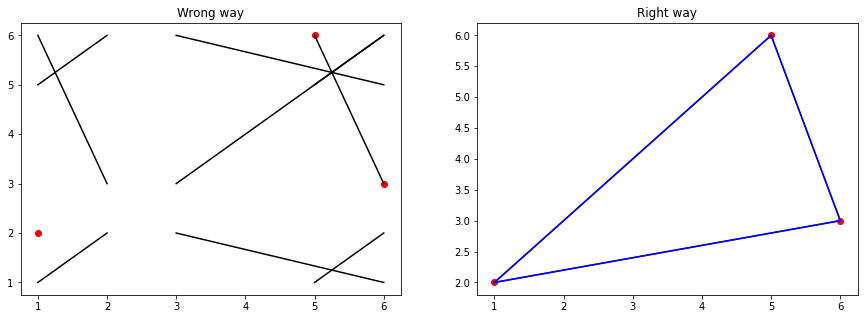

In [68]:
# Hint: How to drow a line between two dots

dots = np.array([[1, 2], [6, 3], [5, 6]])

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Wrong way')        
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(dots[i], dots[j], color = 'black')

plt.subplot(122)
plt.title('Right way')

for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(*zip(dots[i], dots[j]), color = 'blue')